In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Ejemplo con datos generados

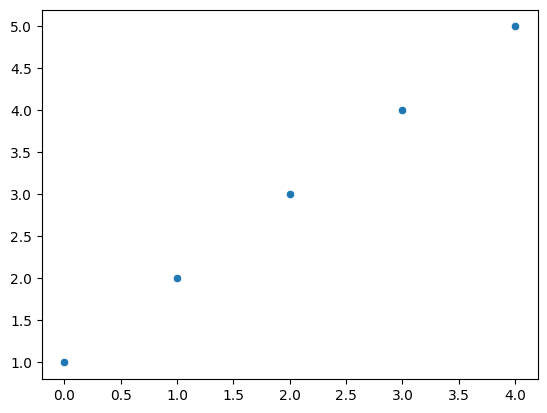

In [2]:
x = np.array([0,1,2,3,4])
y = x + 1
sns.scatterplot(x=x, y=y)
plt.show()

## Correlación

In [3]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

## Regresión Lineal Simple

*y = mx + b*

In [4]:
result = scipy.stats.linregress(x,y)
print(f"Pendiente (m): {result.slope}")
print(f"Intercepto (b): {result.intercept}")

Pendiente (m): 1.0
Intercepto (b): 1.0


In [5]:
m = result.slope
b = result.intercept

In [6]:
x_new = 3.5
y_pred = m*x_new + b
print(f"cuando x = {x_new}, y = {y_pred}")

cuando x = 3.5, y = 4.5


## Graficamos

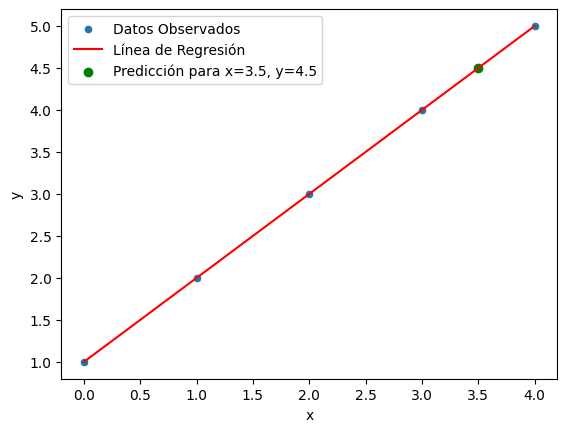

In [7]:
y_pred_x = m * x + b

sns.scatterplot(x=x, y=y, label="Datos Observados")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y_pred_x, "r", label="Línea de Regresión")
plt.scatter(x_new, y_pred, color="green", marker='o', label=f"Predicción para x={x_new}, y={y_pred}")
plt.legend()
plt.show()

# Regresión Lineal Simple con Dataset de Pinguinos

In [8]:
penguins_df = sns.load_dataset("penguins")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Regresión Lineal

In [9]:
penguins_df.dropna(inplace=True)

In [10]:
penguins_res = scipy.stats.linregress(x=penguins_df.flipper_length_mm, y=penguins_df.body_mass_g)
penguins_res

LinregressResult(slope=50.15326594224111, intercept=-5872.092682842823, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.5402309838246344, intercept_stderr=310.2851553513498)

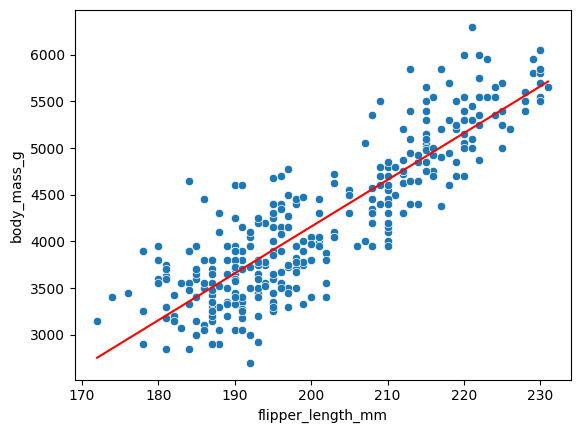

In [11]:
sns.scatterplot(data=penguins_df, x="flipper_length_mm", y="body_mass_g")
m = penguins_res.slope
b = penguins_res.intercept

fx = np.array([penguins_df.flipper_length_mm.min(), penguins_df.flipper_length_mm.max()])
fy = m*fx + b

plt.plot(fx,fy,"r")
plt.show()

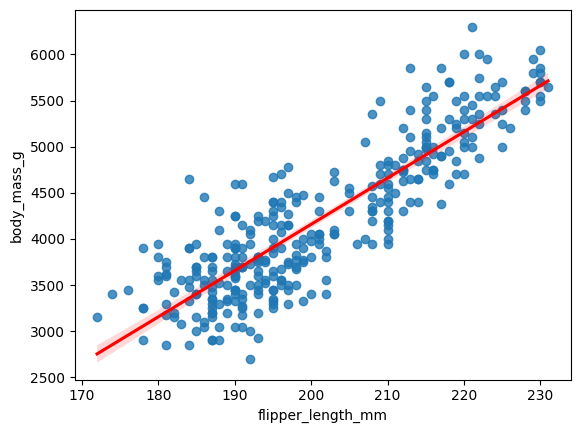

In [13]:
sns.regplot(
    data=penguins_df,
    x="flipper_length_mm",
    y="body_mass_g",
    line_kws={"color":"red"}
)
plt.show()